# Data Science Task - Classification

Using the Scikit-Learn framework, build a set of functioning binary classifiers using provided training data. Use comments to document your major steps (what and why) and any important decisions you make along the way. You can choose any performance metric(s) you like but please include AUC score as an output for the grader.



To access the training data, clone this public GitHub repo and unzip the file called 'testing_data.csv'

https://github.com/MarletteFunding/marlette-ds-challenge



The data columns beginning with 'var' are numeric, and 'cat' are categorical. The target column is labeled 'target'.



# Requirements

1. Build (3) Binary Classifiers using Logistic, Catboost, XGBoost algorithms. Pick the best & measure the metrics (accuracy, precision & recall, AUC score) using the provided training data. You may ensemble them if you wish. 

2. Modify the objective & evaluation functions of algorithm of choice to beat the precision of the model in the first requirement

3. Develop code to find a sample weighting scheme that produces better precision than the model in the second requirement

4. Document the key steps in your workflow (what and why)

5. Your code should be replicable so a grader can run your code and achieve the same results

# Approach

__Data Cleaning__
* I checked duplicates, missing values, outliers, and distribution of the data.
* I replaced outliers with median, and performed a normalization for a better scaling. 
* I encoded the 5 categorical features. They don't have too many unique values, so I used one-hot encoding.

__Data Analysis__
* I checked the balance in the dataset - I see severe imbalance, only 0.94% is class 1.
* I checked the shape of features and found var187 to var192 are right-scewed, and performed log transformation on them.

__Modelling__
* I defined Macro-f1 and Macro-AUC as main metrics for model performance, due to the high imbalance of data.
* In step 1, I tried classfication models Logistic Regression, Catboost and Xgboost, and picked Logistic Regression as the best.
* In step 2, I improved the model precision(macro) from 0.533 to 0.553, by tuning the predicting threshold from default of 0.5 to 0.85.
* In step 3, I further improved the model precision(macro) to 0.606, by assigning different weights to the two classes. 

# Load Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, auc, plot_roc_curve, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample
from category_encoders import TargetEncoder
import scikitplot as skplt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# Exploratory data analysis

In [2]:
df = pd.read_csv('data_ml/marlette/training_data.csv')

In [3]:
df.head()

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var189,var190,var191,var192,cat1,cat2,cat3,cat4,cat5,target
0,44686,86.52893,80.79771,75.25887,74.02016,69.01476,65.61648,63.23896,59.07834,56.80397,...,85.133333,84.45,85.20,85.900000,S,H,C,B,C,0
1,44687,68.56225,72.05599,69.52573,68.79211,65.48515,63.00976,61.19186,57.85757,55.94791,...,90.533333,86.55,87.24,87.300000,S,I,C,B,C,0
2,44688,77.88821,76.62270,73.11046,72.20956,68.26166,65.34046,63.19467,59.25676,57.01834,...,93.933333,90.20,89.84,88.600000,S,I,C,B,C,0
3,44689,81.11949,78.43038,74.59578,73.63714,69.45540,66.35951,64.07976,59.88543,57.50303,...,93.200000,88.15,88.48,87.766667,S,I,C,B,C,0
4,44690,62.18698,68.60618,67.86709,67.44987,65.15601,63.13671,61.52867,58.35072,56.42460,...,92.733333,88.15,88.00,88.566667,S,I,C,B,C,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14193 entries, 0 to 14192
Columns: 199 entries, ID to target
dtypes: float64(192), int64(2), object(5)
memory usage: 21.5+ MB


In [5]:
cat_cols = ["cat1", "cat2", "cat3", "cat4", "cat5"]
for c in cat_cols:
    print(c, f"has {df[c].nunique()} unique values")
df[cat_cols] = df[cat_cols].astype('category')

cat1 has 20 unique values
cat2 has 9 unique values
cat3 has 3 unique values
cat4 has 3 unique values
cat5 has 3 unique values


In [6]:
df['target'].value_counts()

0    14059
1      134
Name: target, dtype: int64

This is a highly imbalanced dataset - class 1 is less than 1/100 of class 0.

In [7]:
df.isnull().sum().sum()

0

There's no missing values.

## Check for duplicates

In [8]:
# duplicate rows?
try:
    number_duplicate_rows = df.duplicated().value_counts().loc[True]
    percent_duplicate_rows = number_duplicate_rows / len(df.index) * 100
    print('%d rows (%.2f %%) are duplicates' %(number_duplicate_rows, percent_duplicate_rows))
except:
    print('No duplicates are found in data')

No duplicates are found in data


In [9]:
df_1 = df.drop(['ID'], axis=1)

var1


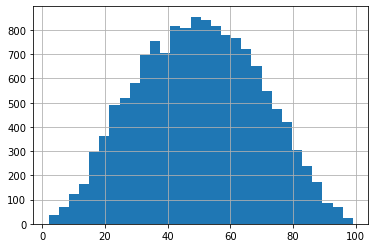

var2


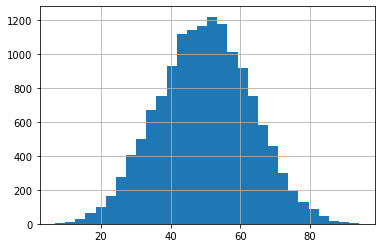

var3


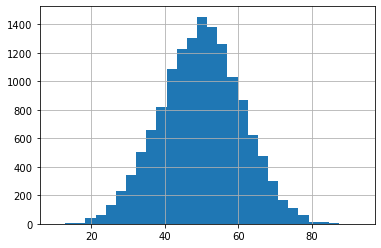

var4


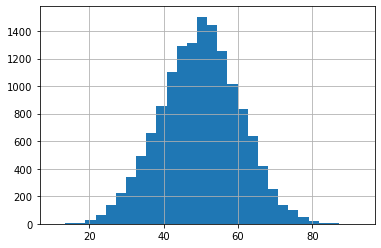

var5


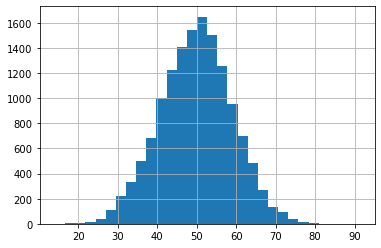

var6


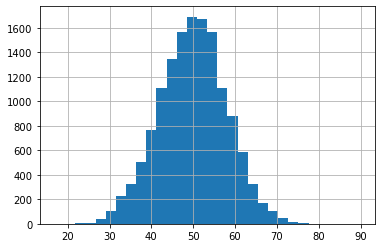

var7


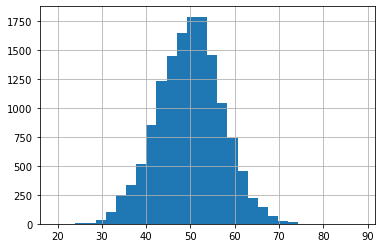

var8


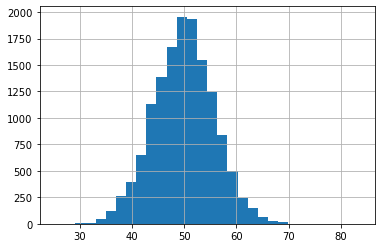

var9


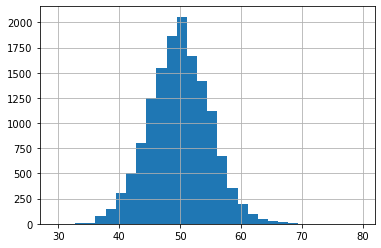

var10


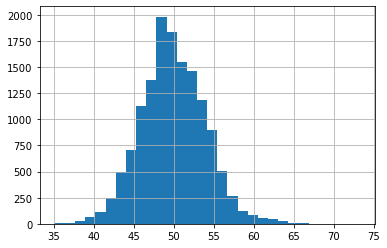

var11


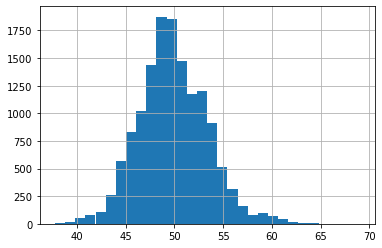

var12


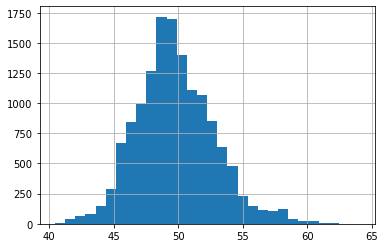

var13


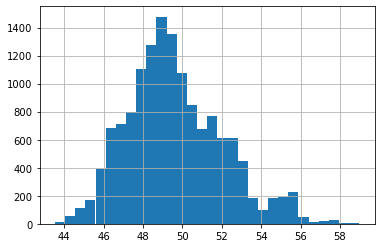

var14


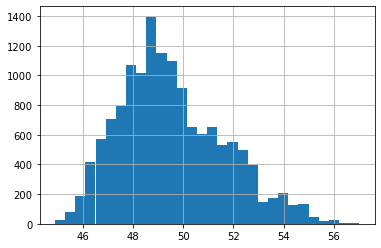

var15


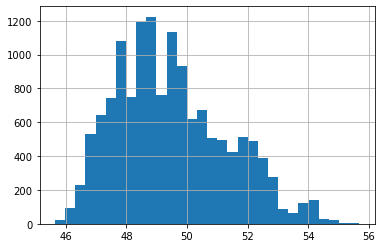

var16


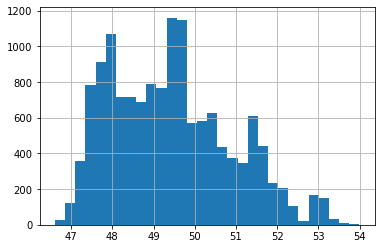

var17


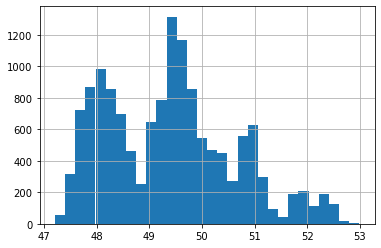

var18


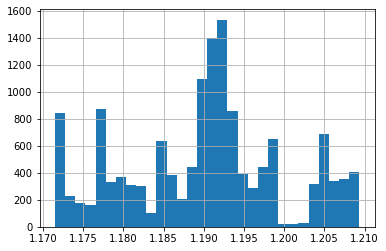

var19


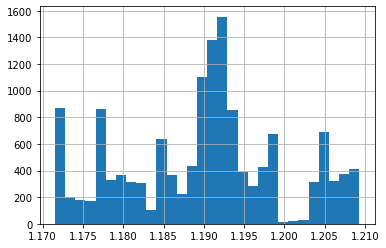

var20


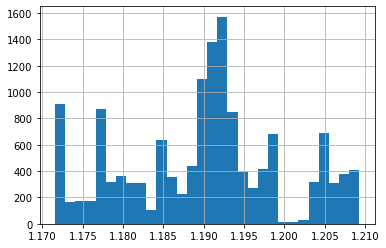

var21


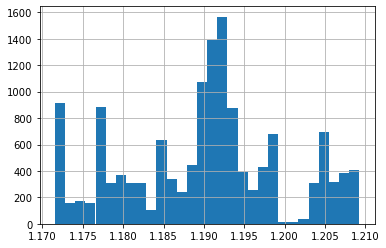

var22


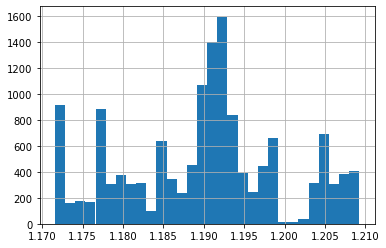

var23


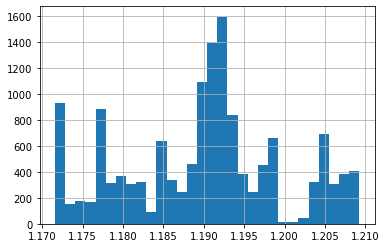

var24


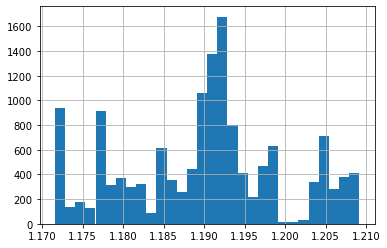

var25


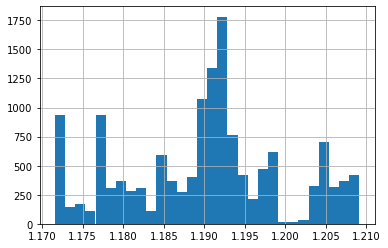

var26


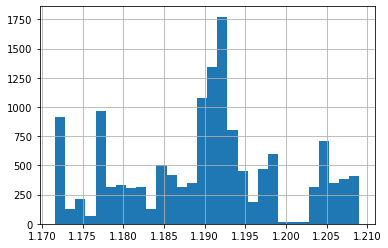

var27


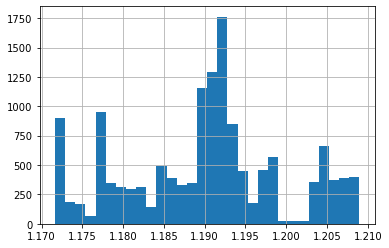

var28


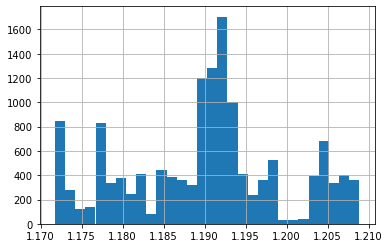

var29


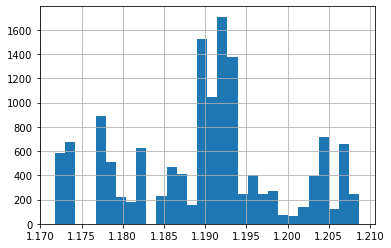

var30


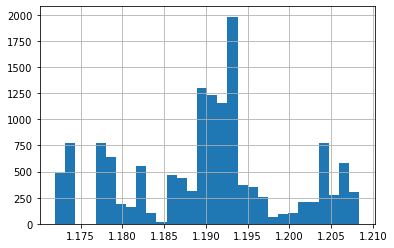

var31


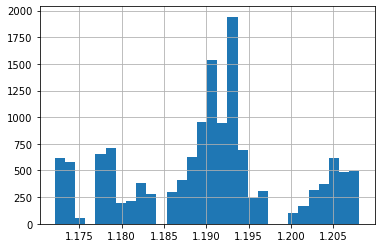

var32


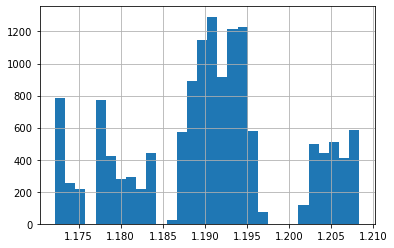

var33


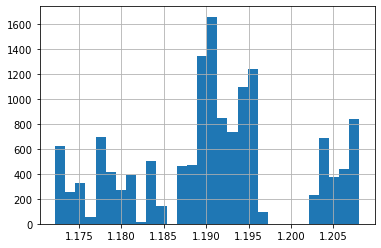

var34


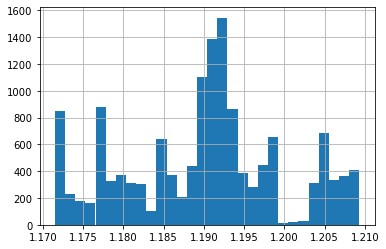

var35


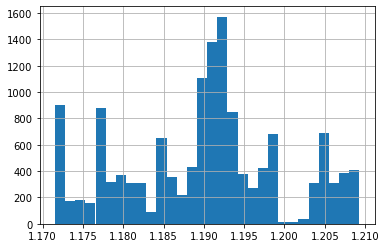

var36


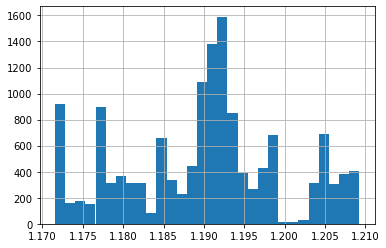

var37


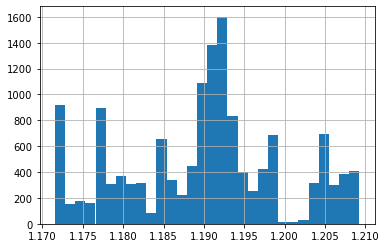

var38


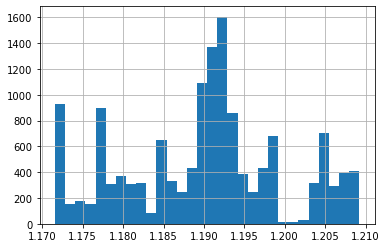

var39


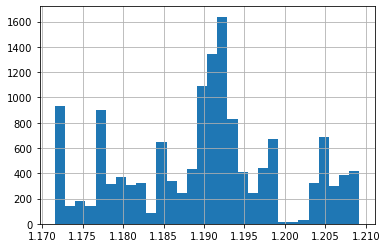

var40


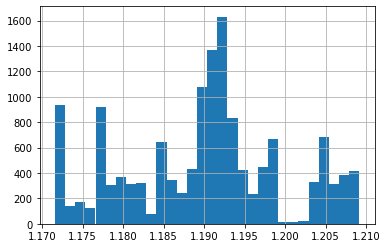

var41


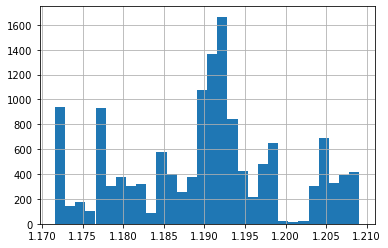

var42


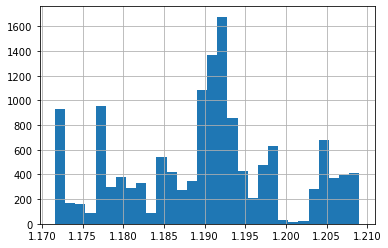

var43


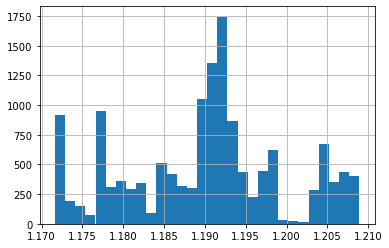

var44


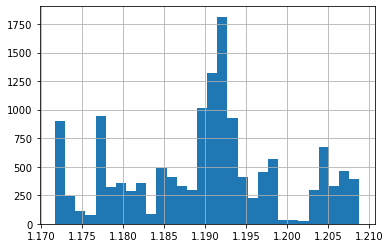

var45


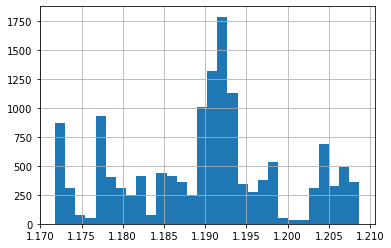

var46


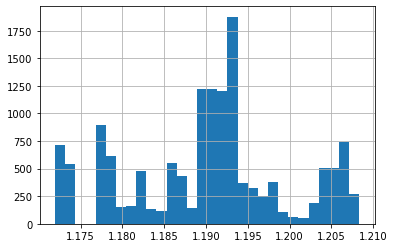

var47


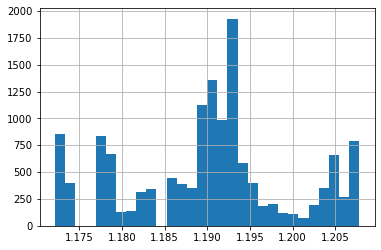

var48


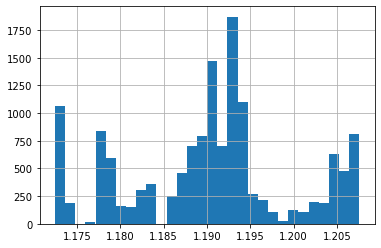

var49


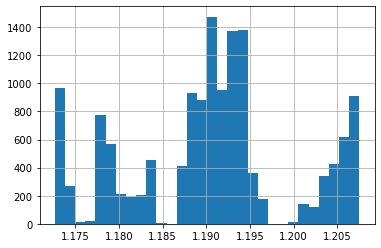

var50


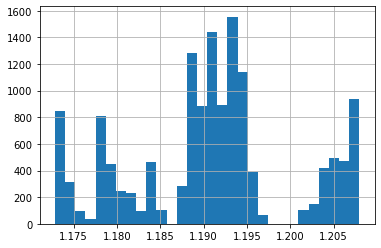

var51


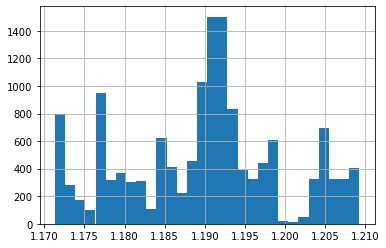

var52


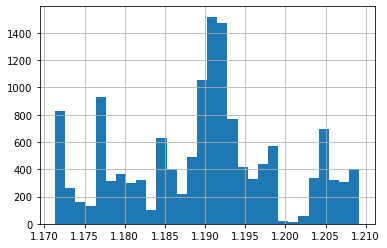

var53


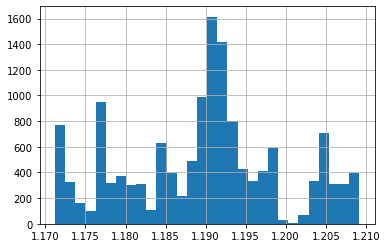

var54


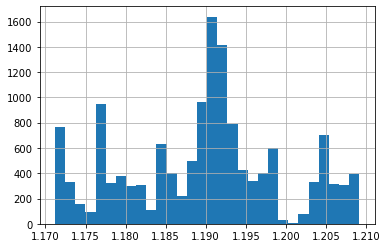

var55


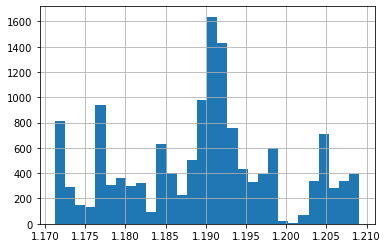

var56


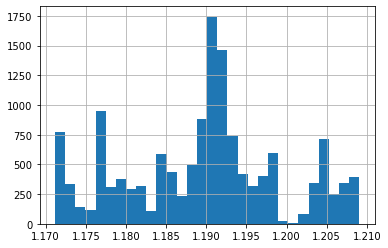

var57


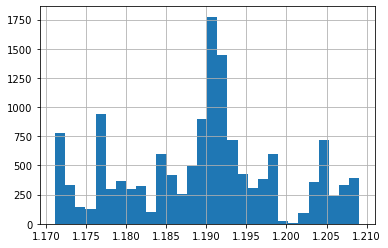

var58


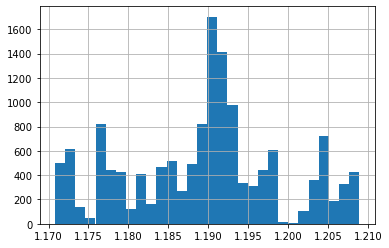

var59


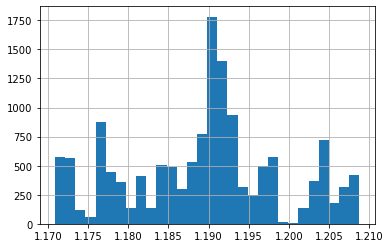

var60


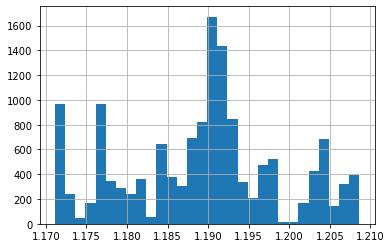

var61


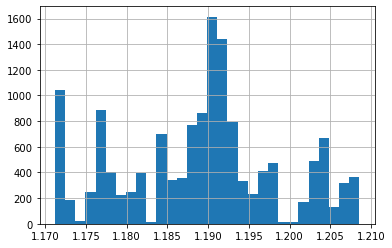

var62


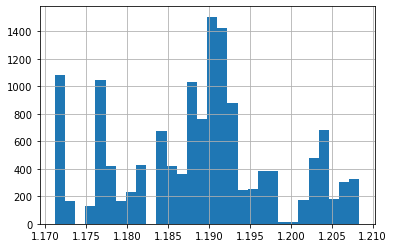

var63


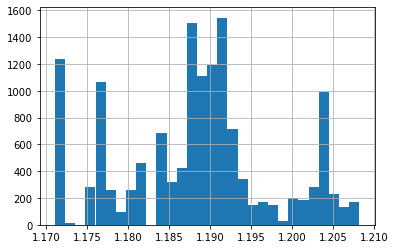

var64


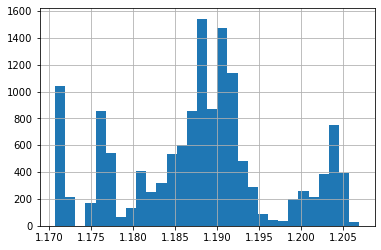

var65


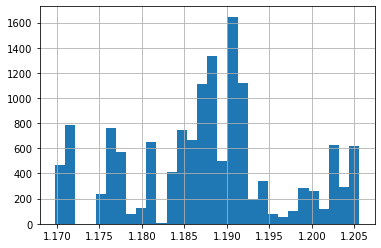

var66


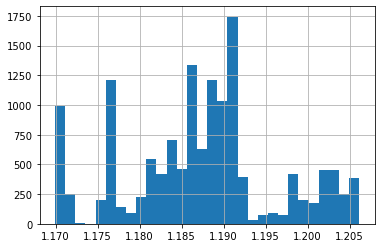

var67


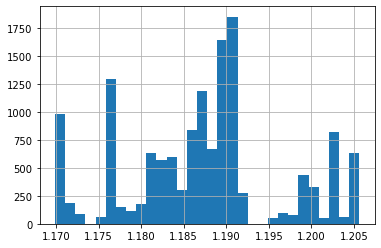

var68


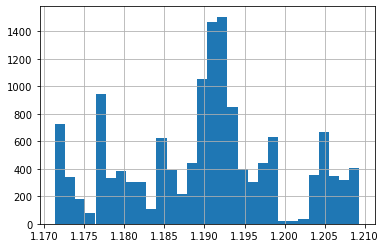

var69


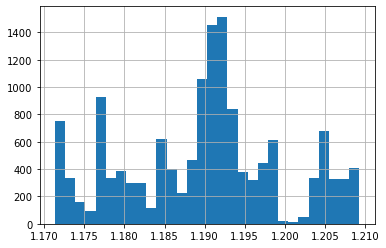

var70


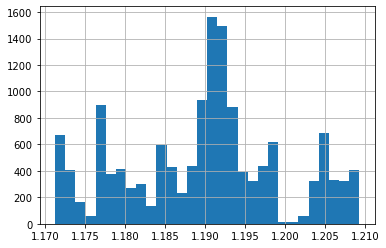

var71


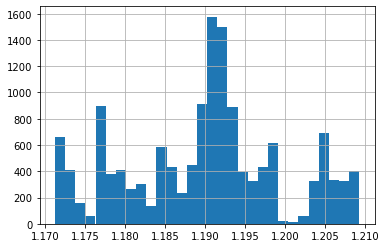

var72


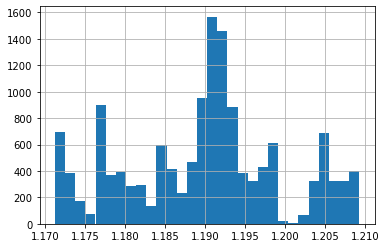

var73


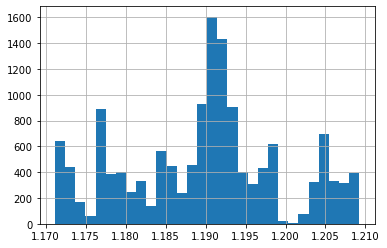

var74


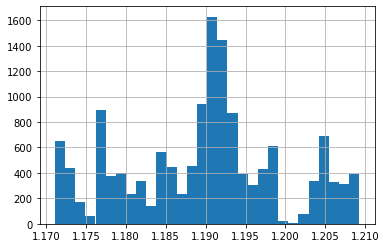

var75


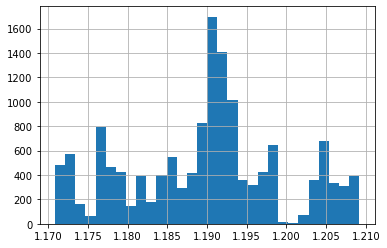

var76


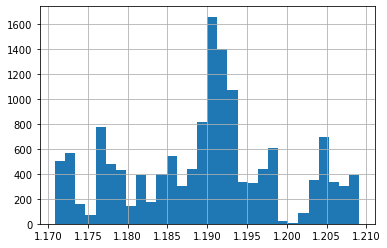

var77


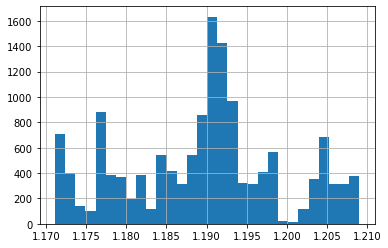

var78


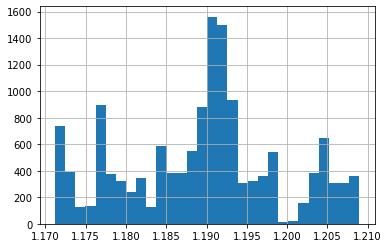

var79


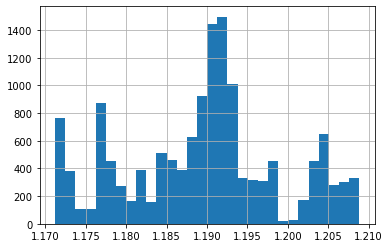

var80


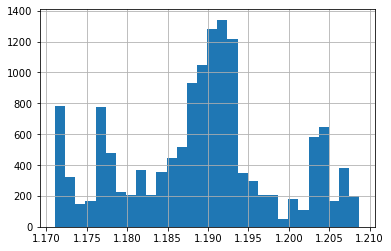

var81


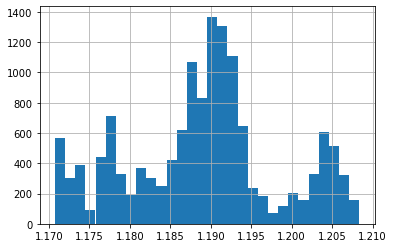

var82


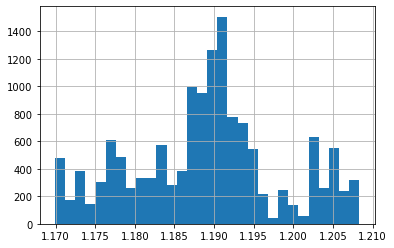

var83


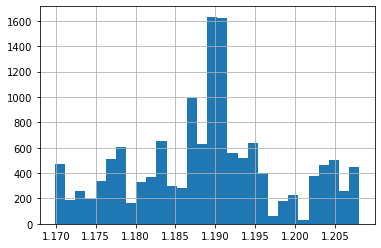

var84


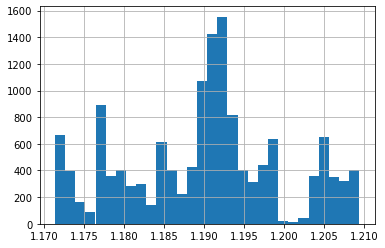

var85


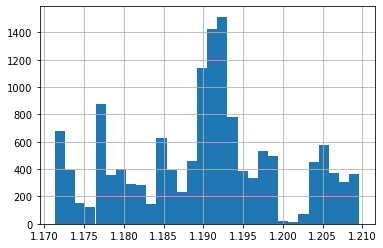

var86


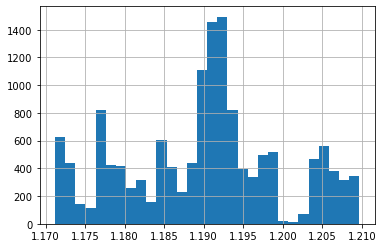

var87


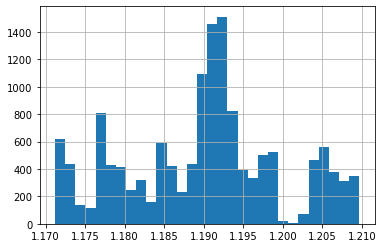

var88


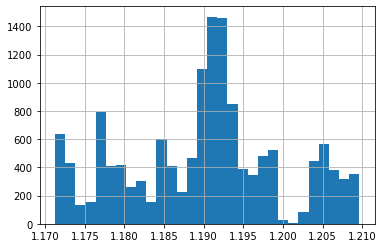

var89


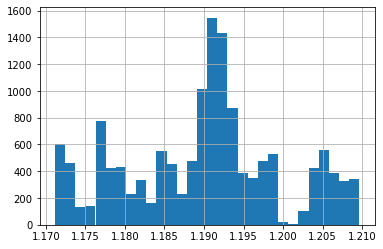

var90


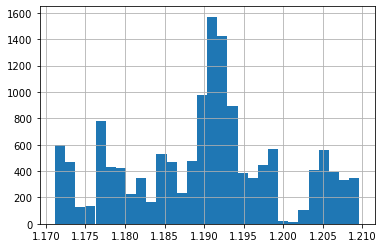

var91


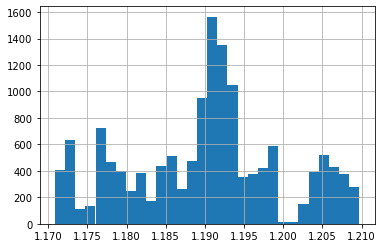

var92


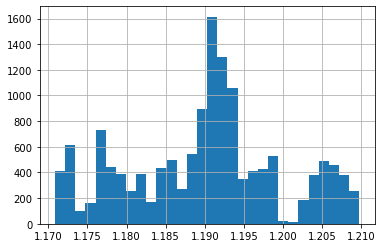

var93


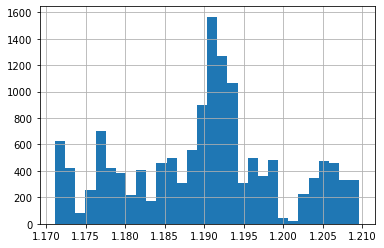

var94


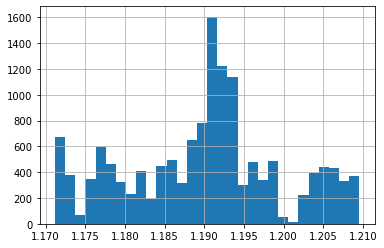

var95


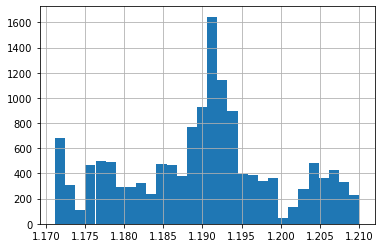

var96


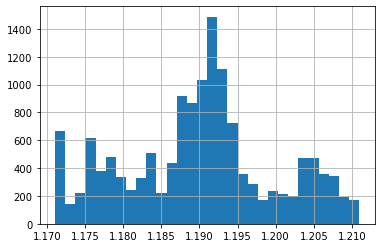

var97


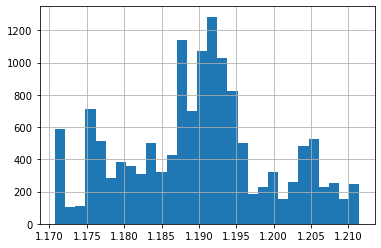

var98


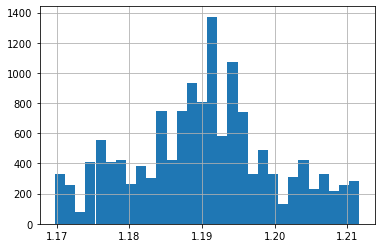

var99


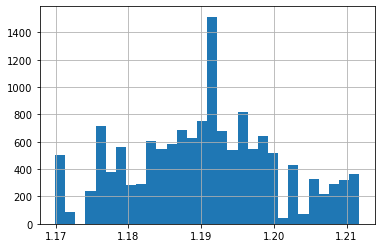

var100


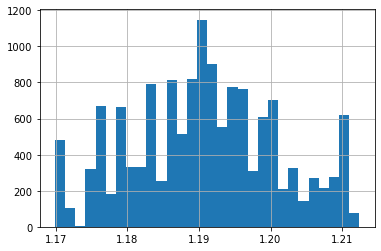

var101


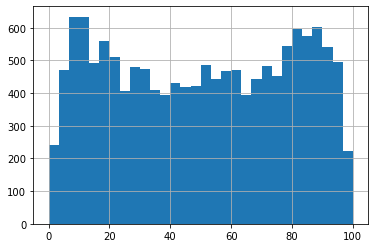

var102


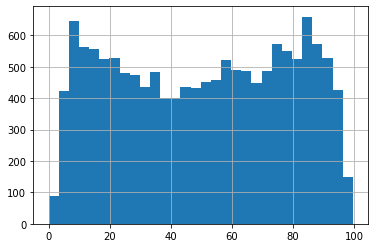

var103


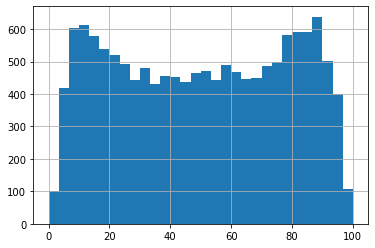

var104


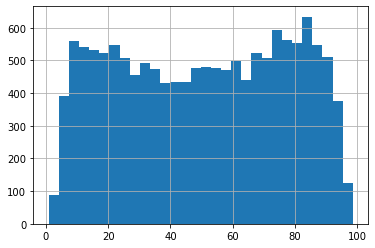

var105


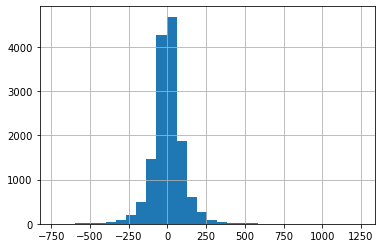

var106


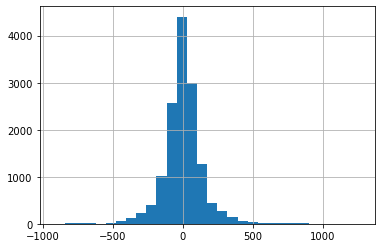

var107


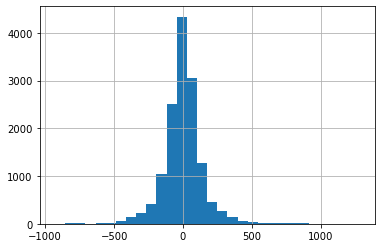

var108


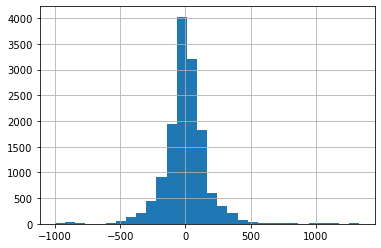

var109


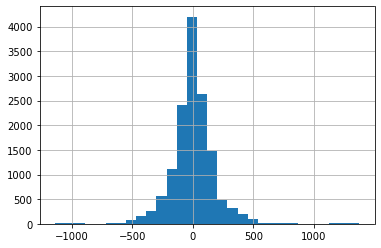

var110


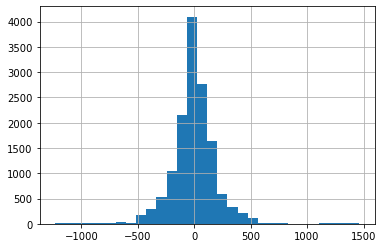

var111


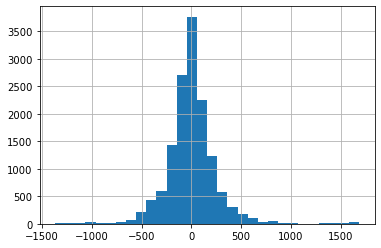

var112


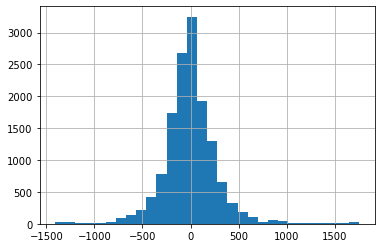

var113


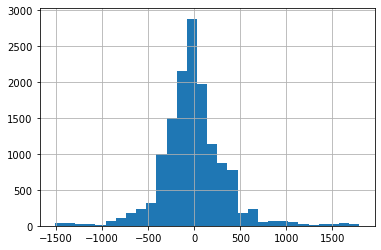

var114


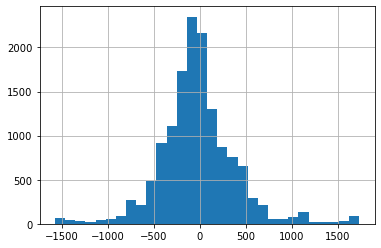

var115


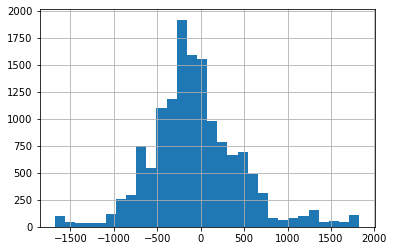

var116


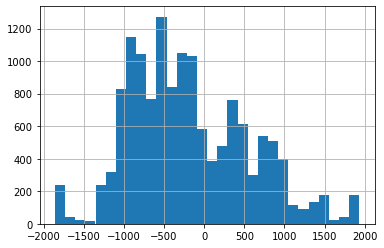

var117


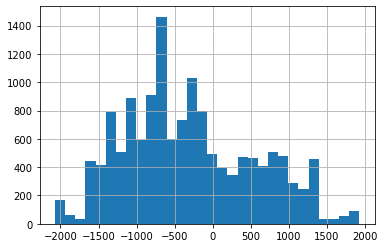

var118


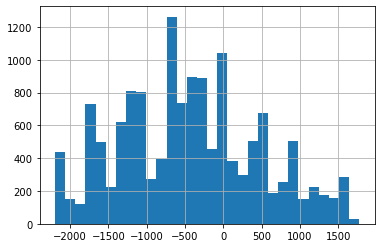

var119


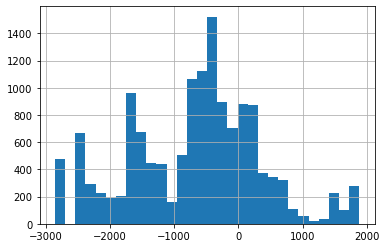

var120


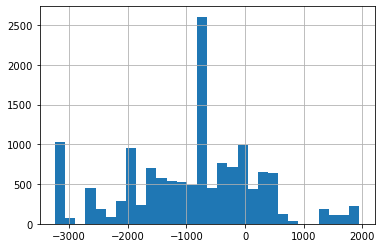

var121


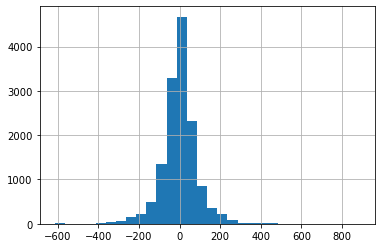

var122


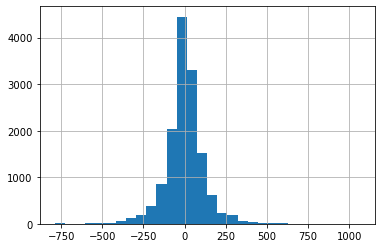

var123


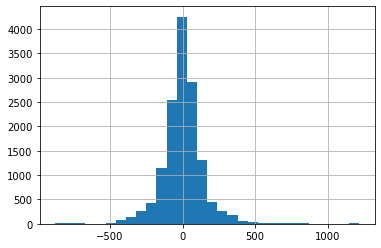

var124


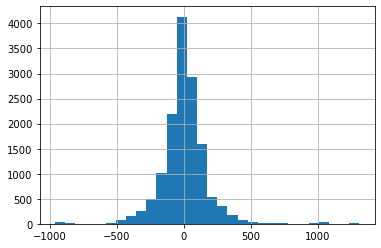

var125


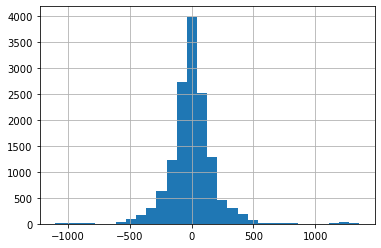

var126


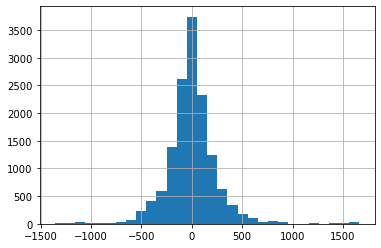

var127


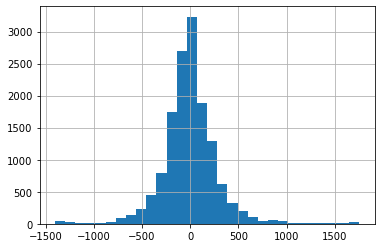

var128


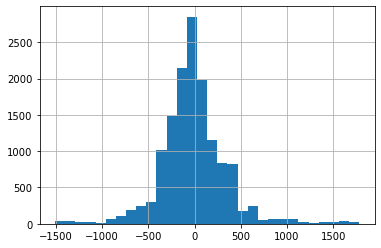

var129


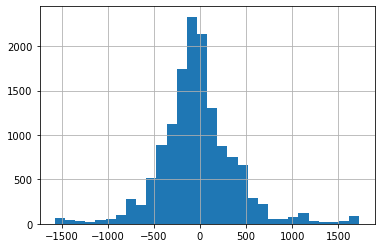

var130


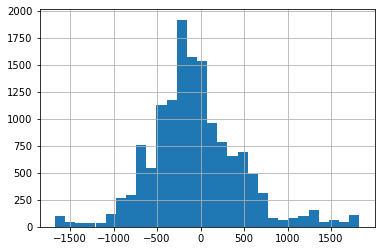

var131


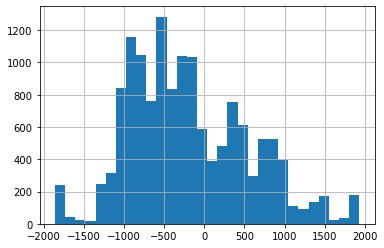

var132


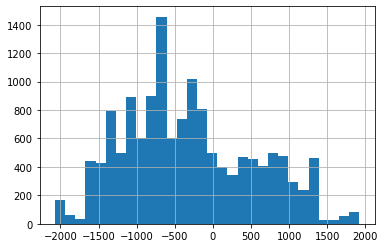

var133


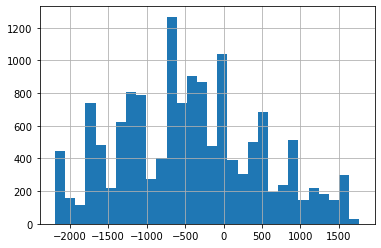

var134


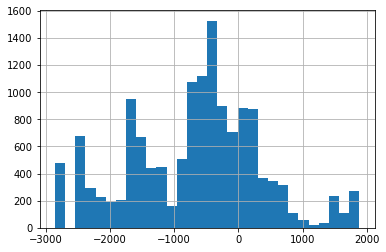

var135


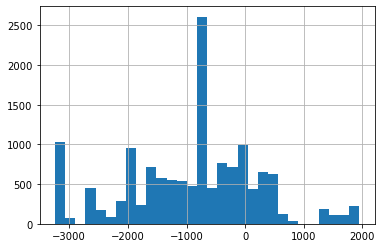

var136


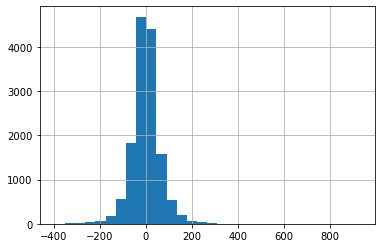

var137


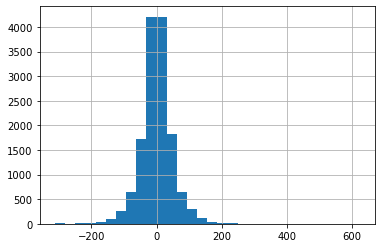

var138


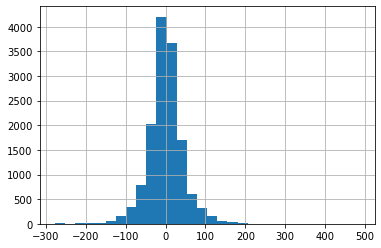

var139


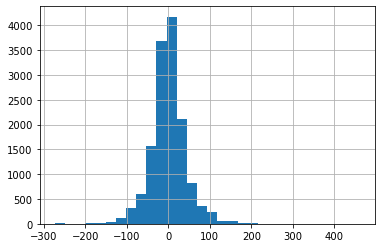

var140


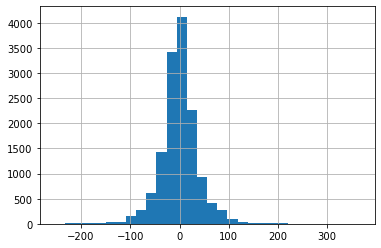

var141


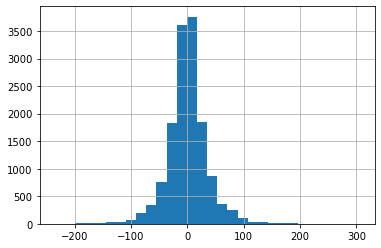

var142


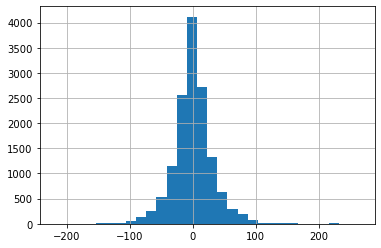

var143


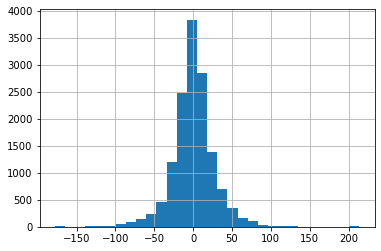

var144


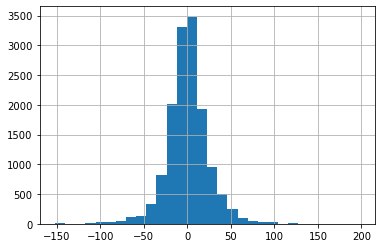

var145


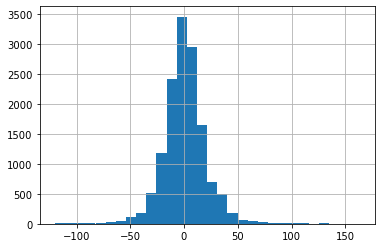

var146


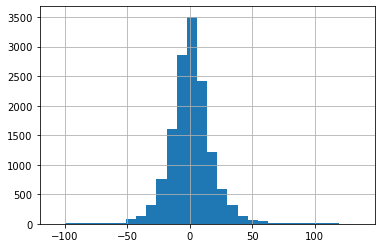

var147


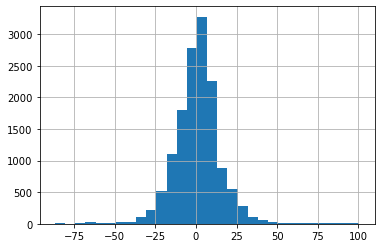

var148


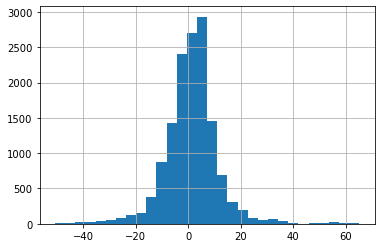

var149


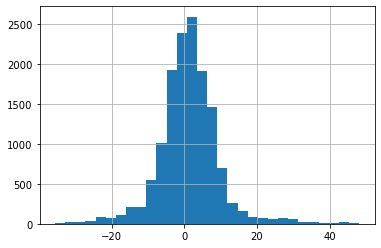

var150


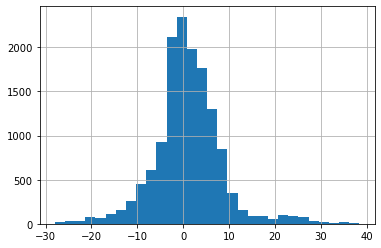

var151


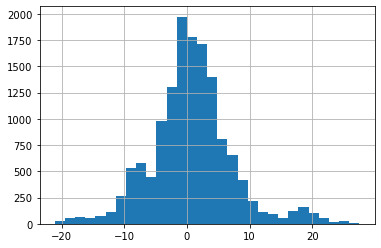

var152


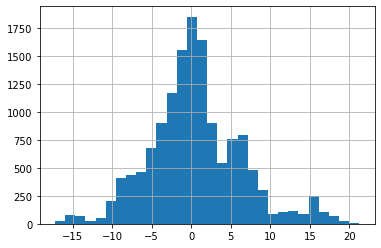

var153


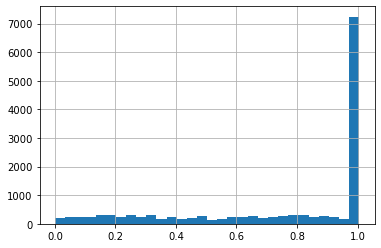

var154


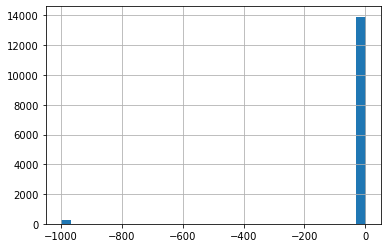

var155


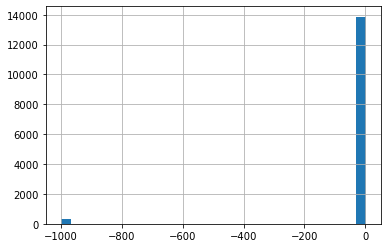

var156


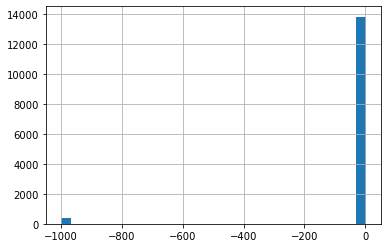

var157


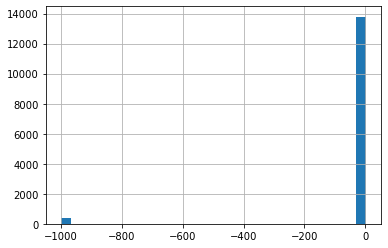

var158


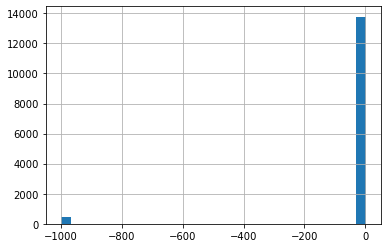

var159


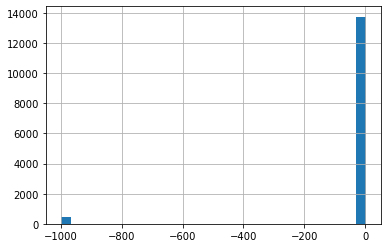

var160


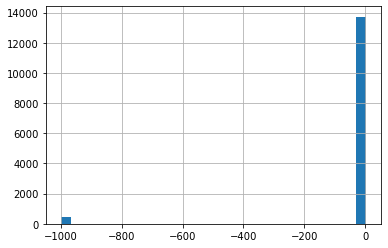

var161


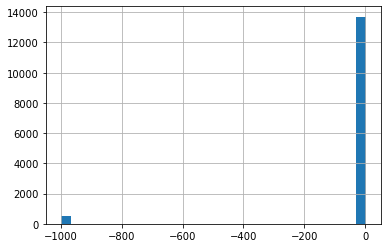

var162


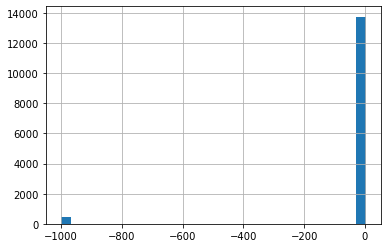

var163


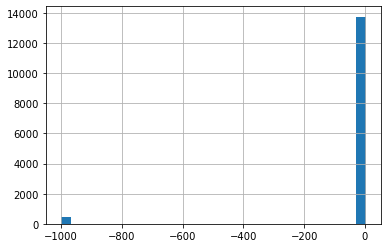

var164


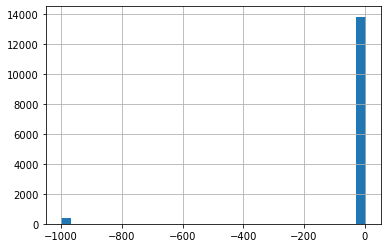

var165


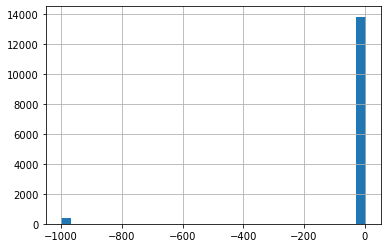

var166


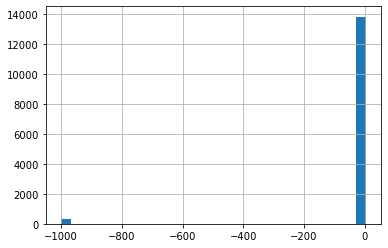

var167


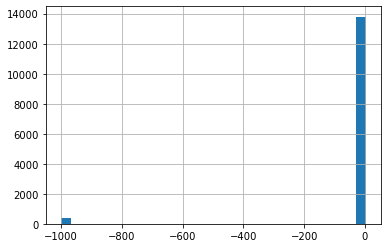

var168


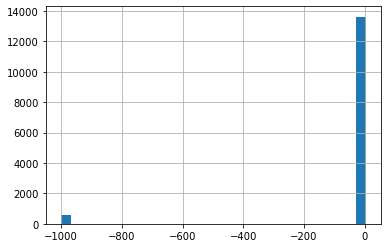

var169


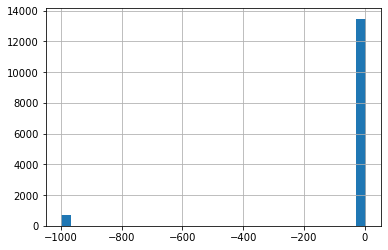

var170


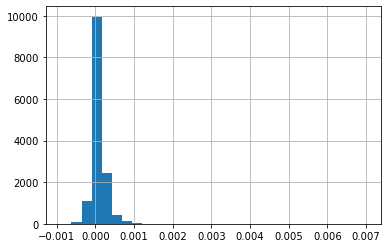

var171


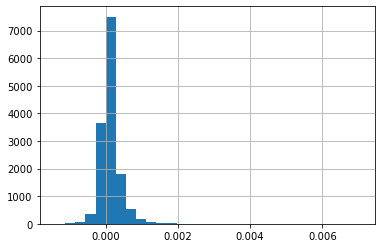

var172


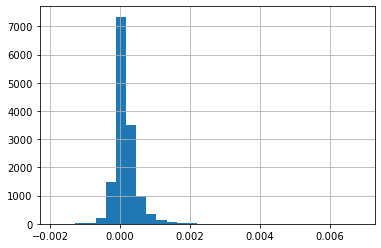

var173


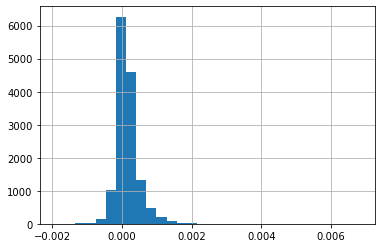

var174


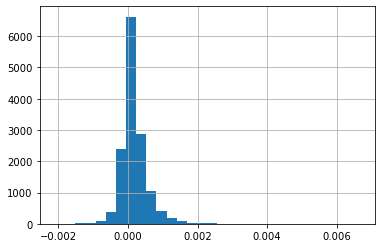

var175


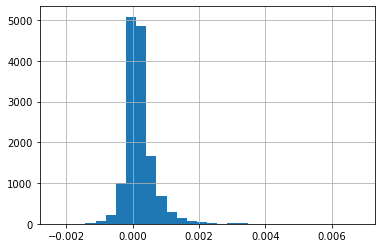

var176


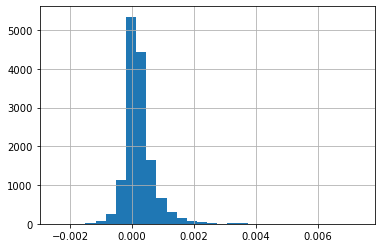

var177


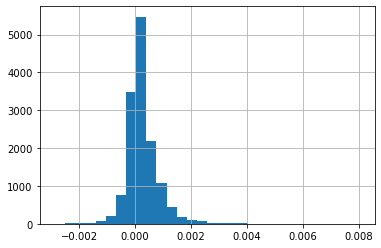

var178


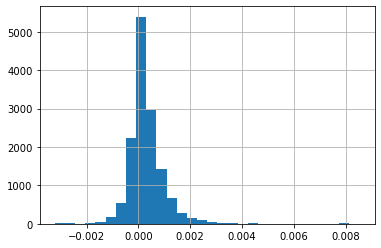

var179


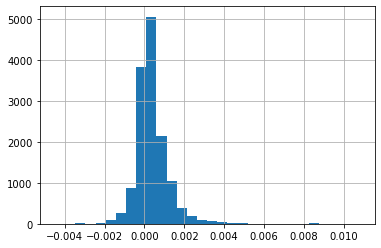

var180


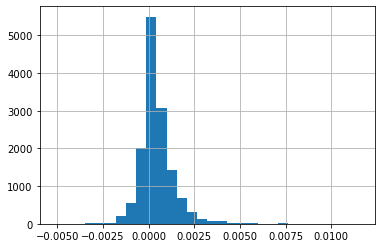

var181


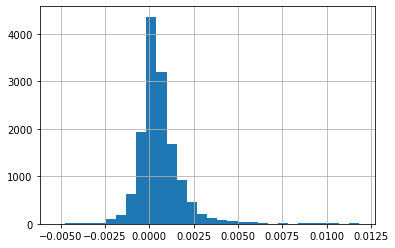

var182


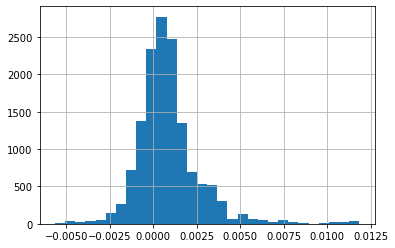

var183


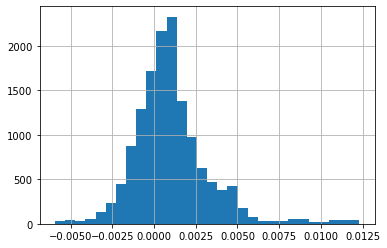

var184


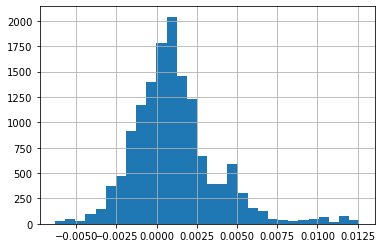

var185


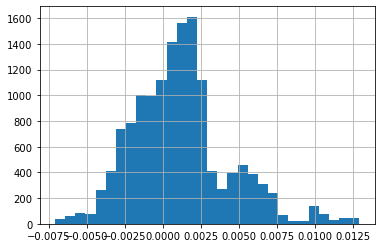

var186


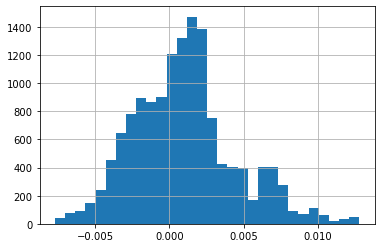

var187


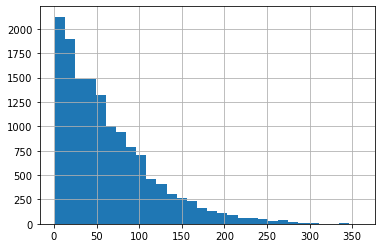

var188


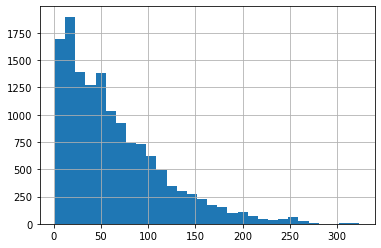

var189


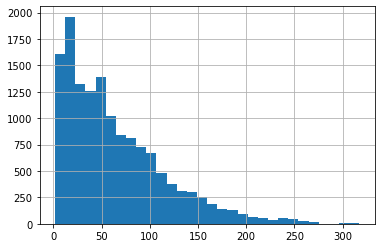

var190


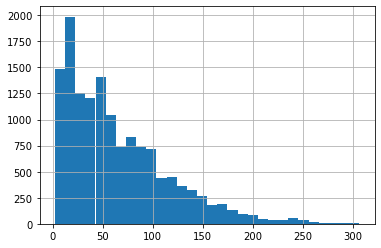

var191


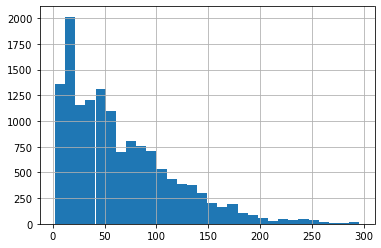

var192


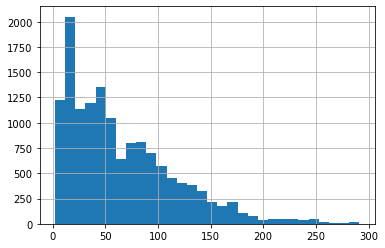

In [10]:
df_num_features = df.drop(['ID', 'target'] + cat_cols, axis=1)
features = list(df_num_features.columns)
for fea in features:
    print(fea)
    df_num_features[fea].hist(bins=30)
    plt.show()

I can see several things:
- var187 to var192 are right-scewed
- var154 to var169 have large outliers = -999
- numerical features have different order of magnitude

Based on this, I will process the data with following steps:
- detect outliers, and replace them with median
- perform a normalization
- preform log transformation on var187 to var192

In [11]:
# Replace outliers (-999) with meadian
for col in range(154, 170):
    fea = 'var' + str(col)
    a = df[fea].replace(-999, np.nan)  
    df[fea] = a.fillna(a.median())

df_num_features = df_num_features = df.drop(['ID', 'target'] + cat_cols, axis=1)

# Min-max normalization
normalized_df = (df_num_features-df_num_features.min()) / (df_num_features.max()-df_num_features.min())   
    
# # Log transform of the right-scewed features
for col in range(187, 193):
    fea = 'var' + str(col)
    normalized_df[fea] = np.log(normalized_df[fea])

In [12]:
normalized_df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var183,var184,var185,var186,var187,var188,var189,var190,var191,var192
0,0.871041,0.846781,0.786746,0.772536,0.712487,0.669245,0.637771,0.580465,0.547415,0.499732,...,0.290022,0.270085,0.268134,0.254758,-1.371282,-1.307899,-1.329817,-1.307250,-1.261942,-1.238057
1,0.685983,0.746743,0.717576,0.708660,0.666674,0.633397,0.607986,0.559544,0.530301,0.485944,...,0.285636,0.266385,0.264632,0.250854,-1.307157,-1.225389,-1.267127,-1.282084,-1.237672,-1.221495
2,0.782041,0.799003,0.760825,0.750414,0.702712,0.665450,0.637127,0.583523,0.551700,0.505062,...,0.293311,0.273256,0.271136,0.257199,-1.216185,-1.168935,-1.229581,-1.239795,-1.207570,-1.206358
3,0.815323,0.819690,0.778745,0.767856,0.718207,0.679464,0.650005,0.594297,0.561390,0.513781,...,0.296601,0.276956,0.274137,0.260615,-1.248849,-1.205524,-1.237561,-1.263326,-1.223203,-1.216035
4,0.620318,0.707265,0.697564,0.692261,0.662402,0.635143,0.612886,0.567996,0.539831,0.496406,...,0.291118,0.271670,0.269635,0.255735,-1.229506,-1.212797,-1.242672,-1.263326,-1.228779,-1.206744


### Encode the categorical features

In [13]:
df_cat_transformed = pd.get_dummies(df[cat_cols],columns=cat_cols)

### Final data

In [14]:
df_final = pd.concat([df['ID'], normalized_df, df_cat_transformed, df['target']], axis=1)

In [15]:
df_final.head()

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,cat3_A,cat3_B,cat3_C,cat4_A,cat4_B,cat4_C,cat5_A,cat5_B,cat5_C,target
0,44686,0.871041,0.846781,0.786746,0.772536,0.712487,0.669245,0.637771,0.580465,0.547415,...,0,0,1,0,1,0,0,0,1,0
1,44687,0.685983,0.746743,0.717576,0.708660,0.666674,0.633397,0.607986,0.559544,0.530301,...,0,0,1,0,1,0,0,0,1,0
2,44688,0.782041,0.799003,0.760825,0.750414,0.702712,0.665450,0.637127,0.583523,0.551700,...,0,0,1,0,1,0,0,0,1,0
3,44689,0.815323,0.819690,0.778745,0.767856,0.718207,0.679464,0.650005,0.594297,0.561390,...,0,0,1,0,1,0,0,0,1,0
4,44690,0.620318,0.707265,0.697564,0.692261,0.662402,0.635143,0.612886,0.567996,0.539831,...,0,0,1,0,1,0,0,0,1,0


In [16]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
df_final = clean_dataset(df_final)

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14181 entries, 0 to 14192
Columns: 232 entries, ID to target
dtypes: float64(232)
memory usage: 25.2 MB


### Now the data looks good to train a model

Since the 2 classes are heavily imbalanced, I will perform a re-sampling first to balance them

In [18]:
# split in train, test and validation
df_train, df_test = train_test_split(df_final, test_size=0.3, random_state=42)

# Upsample the minority class 1
majority = df_train[df_train['target'] == 0]
minority = df_train[df_train['target'] == 1]

minority_upsampled = resample(minority, replace=True, n_samples=majority.shape[0], random_state=42)
train_upsampled = pd.concat([majority, minority_upsampled])

# Separating data and target
y_train = train_upsampled['target']
X_train = train_upsampled.drop(['ID', 'target'], axis=1)

y_test = df_test['target']
X_test = df_test.drop(['ID', 'target'], axis=1)

print("Training Set Size: ", X_train.shape)
print("Test Set Size: ", X_test.shape)

Training Set Size:  (19676, 230)
Test Set Size:  (4255, 230)


## Step 1 - Build 3 Binary Classifiers using Logistic, Catboost, XGBoost algorithms

## Metrics for measuring model performance: macro-f1 and macro-AUC

Because this is a highly imbalanced dataset, where class 1 vs class 0 is only 1:100, I assume class 1 is equally important as class 0. Therefore, I will use macro-f1 and macro-auc as my main metric, while other metrics such as recall, precison, f1 for each class are also considered. 

In [20]:
# Compute and print the confusion matrix and classification report
def model_formance(classifier, y_pred, y_prob):
    print('Recall-macro: %.4f' %metrics.recall_score(y_test, y_pred, average='macro'))
    print('Accuracy: %.4f' %metrics.accuracy_score(y_test, y_pred))
    print('Precision-macro: %.4f' %metrics.precision_score(y_test, y_pred, average='macro'))
    print('f1-macro: %.4f' %metrics.f1_score(y_test, y_pred, average='macro'))  
    print('auc-macro: %.4f' %roc_auc_score(y_test, y_prob[:, 1], average='macro'))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))    

    disp = plot_confusion_matrix(classifier, X_test, y_test, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format='d', cmap=plt.cm.Blues, ax=None)
    disp.ax_.set_title('Confusion Matrix')


## Logistic Regression

In [21]:
clf_lr = LogisticRegression(random_state=123)

In [22]:
# train model
clf_lr.fit(X_train, y_train)
# make prediction
y_pred_lr = clf_lr.predict(X_test)
y_prob_lr = clf_lr.predict_proba(X_test)

Recall-macro: 0.8333
Accuracy: 0.8830
Precision-macro: 0.5330
f1-macro: 0.5318
auc-macro: 0.9293
[[3721  488]
 [  10   36]]
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      4209
         1.0       0.07      0.78      0.13        46

    accuracy                           0.88      4255
   macro avg       0.53      0.83      0.53      4255
weighted avg       0.99      0.88      0.93      4255



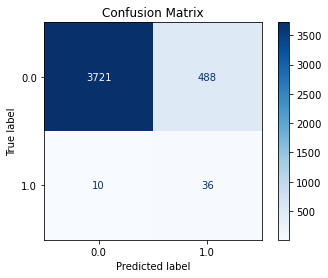

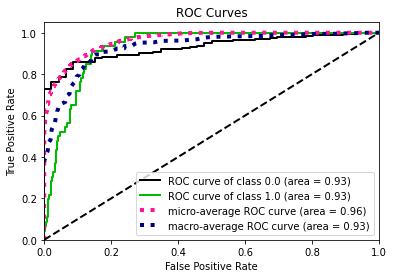

Average precision-recall score: 0.12


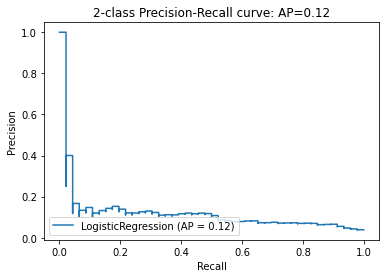

In [23]:
# model performance
model_formance(clf_lr, y_pred_lr, y_prob_lr)
# ROC-AUC curve
skplt.metrics.plot_roc_curve(y_test, y_prob_lr)
plt.show()
# precision-recall curve
y_score = clf_lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(clf_lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

Logistic Regression performs ok, regarding both majority class prediction. Minority (class=1) is not optimal, I'll check Catboost and Xgboost.  

## Catboost

In [24]:
# catboost model
clf_cb = CatBoostClassifier(random_state=123)

# train model
clf_cb.fit(X_train, y_train)

# make prediction
y_pred_cb = clf_cb.predict(X_test)
y_prob_cb = clf_cb.predict_proba(X_test)

Learning rate set to 0.036766
0:	learn: 0.6356467	total: 158ms	remaining: 2m 37s
1:	learn: 0.5869552	total: 176ms	remaining: 1m 27s
2:	learn: 0.5383694	total: 196ms	remaining: 1m 5s
3:	learn: 0.4944356	total: 217ms	remaining: 54.1s
4:	learn: 0.4660608	total: 235ms	remaining: 46.8s
5:	learn: 0.4380496	total: 254ms	remaining: 42s
6:	learn: 0.4141644	total: 272ms	remaining: 38.6s
7:	learn: 0.3876956	total: 291ms	remaining: 36.1s
8:	learn: 0.3657471	total: 309ms	remaining: 34s
9:	learn: 0.3468965	total: 329ms	remaining: 32.5s
10:	learn: 0.3298168	total: 348ms	remaining: 31.3s
11:	learn: 0.3150382	total: 368ms	remaining: 30.3s
12:	learn: 0.3003603	total: 389ms	remaining: 29.5s
13:	learn: 0.2863756	total: 409ms	remaining: 28.8s
14:	learn: 0.2772402	total: 428ms	remaining: 28.1s
15:	learn: 0.2681016	total: 447ms	remaining: 27.5s
16:	learn: 0.2584928	total: 467ms	remaining: 27s
17:	learn: 0.2515360	total: 486ms	remaining: 26.5s
18:	learn: 0.2447380	total: 504ms	remaining: 26s
19:	learn: 0.2362

163:	learn: 0.0315865	total: 3.57s	remaining: 18.2s
164:	learn: 0.0314330	total: 3.59s	remaining: 18.2s
165:	learn: 0.0309993	total: 3.61s	remaining: 18.2s
166:	learn: 0.0307291	total: 3.63s	remaining: 18.1s
167:	learn: 0.0304353	total: 3.65s	remaining: 18.1s
168:	learn: 0.0302538	total: 3.68s	remaining: 18.1s
169:	learn: 0.0298868	total: 3.7s	remaining: 18s
170:	learn: 0.0297220	total: 3.72s	remaining: 18s
171:	learn: 0.0296594	total: 3.73s	remaining: 18s
172:	learn: 0.0294473	total: 3.76s	remaining: 18s
173:	learn: 0.0292200	total: 3.78s	remaining: 17.9s
174:	learn: 0.0288420	total: 3.8s	remaining: 17.9s
175:	learn: 0.0286694	total: 3.82s	remaining: 17.9s
176:	learn: 0.0284784	total: 3.84s	remaining: 17.8s
177:	learn: 0.0282201	total: 3.86s	remaining: 17.8s
178:	learn: 0.0280344	total: 3.88s	remaining: 17.8s
179:	learn: 0.0279210	total: 3.9s	remaining: 17.8s
180:	learn: 0.0277255	total: 3.92s	remaining: 17.7s
181:	learn: 0.0275321	total: 3.94s	remaining: 17.7s
182:	learn: 0.0273757	t

328:	learn: 0.0109070	total: 7.26s	remaining: 14.8s
329:	learn: 0.0108607	total: 7.29s	remaining: 14.8s
330:	learn: 0.0107925	total: 7.31s	remaining: 14.8s
331:	learn: 0.0107633	total: 7.34s	remaining: 14.8s
332:	learn: 0.0107028	total: 7.37s	remaining: 14.8s
333:	learn: 0.0106812	total: 7.4s	remaining: 14.8s
334:	learn: 0.0106584	total: 7.44s	remaining: 14.8s
335:	learn: 0.0106095	total: 7.47s	remaining: 14.8s
336:	learn: 0.0105787	total: 7.5s	remaining: 14.8s
337:	learn: 0.0105456	total: 7.52s	remaining: 14.7s
338:	learn: 0.0104992	total: 7.55s	remaining: 14.7s
339:	learn: 0.0104223	total: 7.57s	remaining: 14.7s
340:	learn: 0.0104016	total: 7.59s	remaining: 14.7s
341:	learn: 0.0103725	total: 7.62s	remaining: 14.7s
342:	learn: 0.0103301	total: 7.65s	remaining: 14.7s
343:	learn: 0.0102750	total: 7.67s	remaining: 14.6s
344:	learn: 0.0102364	total: 7.69s	remaining: 14.6s
345:	learn: 0.0101866	total: 7.71s	remaining: 14.6s
346:	learn: 0.0101444	total: 7.73s	remaining: 14.6s
347:	learn: 0.

489:	learn: 0.0055914	total: 11.4s	remaining: 11.8s
490:	learn: 0.0055456	total: 11.4s	remaining: 11.8s
491:	learn: 0.0055156	total: 11.4s	remaining: 11.8s
492:	learn: 0.0054993	total: 11.5s	remaining: 11.8s
493:	learn: 0.0054758	total: 11.5s	remaining: 11.8s
494:	learn: 0.0054492	total: 11.5s	remaining: 11.8s
495:	learn: 0.0054225	total: 11.5s	remaining: 11.7s
496:	learn: 0.0054140	total: 11.6s	remaining: 11.7s
497:	learn: 0.0054006	total: 11.6s	remaining: 11.7s
498:	learn: 0.0053553	total: 11.6s	remaining: 11.7s
499:	learn: 0.0053236	total: 11.6s	remaining: 11.6s
500:	learn: 0.0053054	total: 11.7s	remaining: 11.6s
501:	learn: 0.0052893	total: 11.7s	remaining: 11.6s
502:	learn: 0.0052425	total: 11.7s	remaining: 11.6s
503:	learn: 0.0052032	total: 11.7s	remaining: 11.5s
504:	learn: 0.0051915	total: 11.7s	remaining: 11.5s
505:	learn: 0.0051803	total: 11.8s	remaining: 11.5s
506:	learn: 0.0051568	total: 11.8s	remaining: 11.5s
507:	learn: 0.0051342	total: 11.8s	remaining: 11.4s
508:	learn: 

648:	learn: 0.0035726	total: 15.1s	remaining: 8.17s
649:	learn: 0.0035659	total: 15.1s	remaining: 8.14s
650:	learn: 0.0035421	total: 15.2s	remaining: 8.12s
651:	learn: 0.0035421	total: 15.2s	remaining: 8.1s
652:	learn: 0.0035421	total: 15.2s	remaining: 8.07s
653:	learn: 0.0035421	total: 15.2s	remaining: 8.05s
654:	learn: 0.0035421	total: 15.2s	remaining: 8.03s
655:	learn: 0.0035329	total: 15.3s	remaining: 8s
656:	learn: 0.0035237	total: 15.3s	remaining: 7.98s
657:	learn: 0.0035168	total: 15.3s	remaining: 7.95s
658:	learn: 0.0035168	total: 15.3s	remaining: 7.93s
659:	learn: 0.0035168	total: 15.3s	remaining: 7.9s
660:	learn: 0.0034974	total: 15.4s	remaining: 7.88s
661:	learn: 0.0034891	total: 15.4s	remaining: 7.86s
662:	learn: 0.0034891	total: 15.4s	remaining: 7.83s
663:	learn: 0.0034790	total: 15.4s	remaining: 7.8s
664:	learn: 0.0034666	total: 15.4s	remaining: 7.78s
665:	learn: 0.0034666	total: 15.5s	remaining: 7.75s
666:	learn: 0.0034666	total: 15.5s	remaining: 7.73s
667:	learn: 0.0034

812:	learn: 0.0029998	total: 18.5s	remaining: 4.27s
813:	learn: 0.0029998	total: 18.6s	remaining: 4.24s
814:	learn: 0.0029998	total: 18.6s	remaining: 4.22s
815:	learn: 0.0029998	total: 18.6s	remaining: 4.2s
816:	learn: 0.0029998	total: 18.6s	remaining: 4.17s
817:	learn: 0.0029998	total: 18.6s	remaining: 4.15s
818:	learn: 0.0029998	total: 18.7s	remaining: 4.13s
819:	learn: 0.0029948	total: 18.7s	remaining: 4.1s
820:	learn: 0.0029948	total: 18.7s	remaining: 4.08s
821:	learn: 0.0029792	total: 18.7s	remaining: 4.05s
822:	learn: 0.0029698	total: 18.8s	remaining: 4.03s
823:	learn: 0.0029698	total: 18.8s	remaining: 4.01s
824:	learn: 0.0029698	total: 18.8s	remaining: 3.98s
825:	learn: 0.0029698	total: 18.8s	remaining: 3.96s
826:	learn: 0.0029558	total: 18.8s	remaining: 3.94s
827:	learn: 0.0029496	total: 18.9s	remaining: 3.92s
828:	learn: 0.0029398	total: 18.9s	remaining: 3.89s
829:	learn: 0.0029398	total: 18.9s	remaining: 3.87s
830:	learn: 0.0029341	total: 18.9s	remaining: 3.85s
831:	learn: 0.

971:	learn: 0.0026768	total: 21.9s	remaining: 632ms
972:	learn: 0.0026768	total: 21.9s	remaining: 609ms
973:	learn: 0.0026768	total: 22s	remaining: 586ms
974:	learn: 0.0026703	total: 22s	remaining: 564ms
975:	learn: 0.0026637	total: 22s	remaining: 541ms
976:	learn: 0.0026637	total: 22s	remaining: 519ms
977:	learn: 0.0026637	total: 22s	remaining: 496ms
978:	learn: 0.0026637	total: 22.1s	remaining: 473ms
979:	learn: 0.0026637	total: 22.1s	remaining: 451ms
980:	learn: 0.0026637	total: 22.1s	remaining: 428ms
981:	learn: 0.0026558	total: 22.1s	remaining: 406ms
982:	learn: 0.0026559	total: 22.1s	remaining: 383ms
983:	learn: 0.0026558	total: 22.2s	remaining: 360ms
984:	learn: 0.0026558	total: 22.2s	remaining: 338ms
985:	learn: 0.0026558	total: 22.2s	remaining: 315ms
986:	learn: 0.0026558	total: 22.2s	remaining: 293ms
987:	learn: 0.0026558	total: 22.2s	remaining: 270ms
988:	learn: 0.0026558	total: 22.3s	remaining: 248ms
989:	learn: 0.0026558	total: 22.3s	remaining: 225ms
990:	learn: 0.0026558	

Recall-macro: 0.5311
Accuracy: 0.9868
Precision-macro: 0.5887
f1-macro: 0.5451
auc-macro: 0.9164
[[4196   13]
 [  43    3]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4209
         1.0       0.19      0.07      0.10        46

    accuracy                           0.99      4255
   macro avg       0.59      0.53      0.55      4255
weighted avg       0.98      0.99      0.98      4255



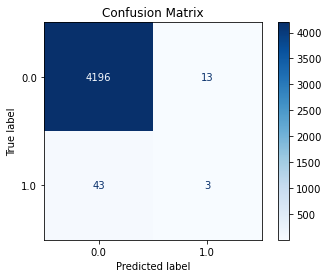

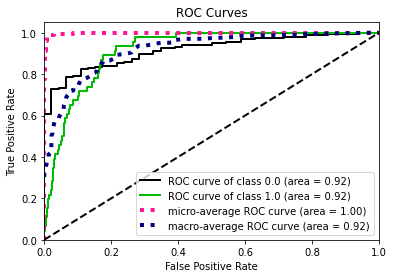

In [25]:
# model performance
model_formance(clf_cb, y_pred_cb, y_prob_cb)
# ROC-AUC curve
skplt.metrics.plot_roc_curve(y_test, y_prob_cb)
plt.show()

CatBoost does not perform better than Logistic Regression, in terms of the minority class (class=1) prediction. I would favor Logistic Regression because it's able to detect more minority datapoints. Here I simply assume this is an anomally detection problem, and the cost of FN and FP are equal. However, in reality, I need to know the business goal and cost of different types of modeling erros to make a decision. 

## XGBoost

In [26]:
clf_xb = XGBClassifier(eval_metric='logloss', random_state=123)

In [27]:
# train model
clf_xb.fit(X_train, y_train)

# make prediction
y_pred_xb = clf_xb.predict(X_test)
y_prob_xb = clf_xb.predict_proba(X_test)

In [28]:
print(clf_xb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Recall-macro: 0.5105
Accuracy: 0.9887
Precision-macro: 0.6197
f1-macro: 0.5172
auc-macro: 0.9073
[[4206    3]
 [  45    1]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4209
         1.0       0.25      0.02      0.04        46

    accuracy                           0.99      4255
   macro avg       0.62      0.51      0.52      4255
weighted avg       0.98      0.99      0.98      4255



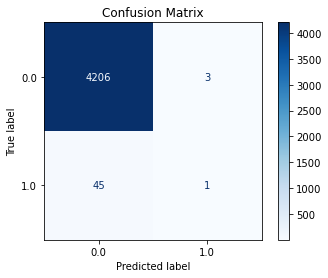

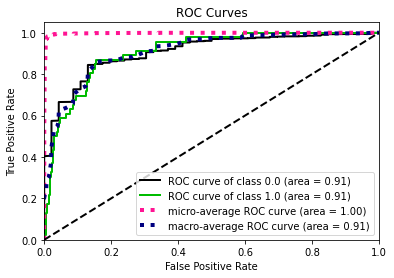

In [29]:
# model performance
model_formance(clf_xb, y_pred_xb, y_prob_xb)
# ROC-AUC curve
skplt.metrics.plot_roc_curve(y_test, y_prob_xb)
plt.show()

- XGBoost is even worse than CatBoost, it only correctly predicts one real minority class (class=1).
- So far, Logistic Regression has the best performance.
- I will pick Logistic Regression, and move to step 2 and step 3.

# Step 2 - Modify the objective & evaluation functions of algorithm of choice to beat the precision of the model in the first requirement

I will try to tune the threshold in Logistic Regression to improve precision. The default predicting threshold is 0.5, meaning is the probability is greater than 0.5, the model predicts a result as 1, otherwise 0. Here I will try a grid search and see how does the threshold affect precision, as well as other metrics. 

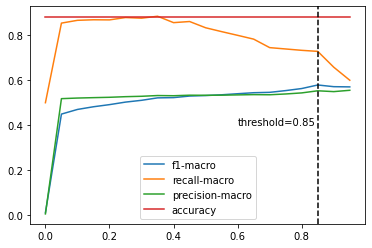

In [30]:
def tune_threshold(clf):
    t = []
    recall = []
    accuracy = []
    precision = []
    macro_f1 = []
    auc_score = []
    auc_test = []
    for threshold in np.arange(0, 1, 0.05):
        t.append(threshold)
        y_pred = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
        # model performance        
        recall.append(metrics.recall_score(y_test, y_pred, average='macro'))
        accuracy.append(clf.score(X_test, y_test))
        precision.append(metrics.precision_score(y_test, y_pred, average='macro'))
        macro_f1.append(metrics.f1_score(y_test, y_pred, average='macro'))        
        
    # plot lines
    plt.plot(t, macro_f1, label = "f1-macro")
    plt.plot(t, recall, label = "recall-macro")
    plt.plot(t, precision, label = "precision-macro")
    plt.plot(t, accuracy, label = "accuracy")
    plt.axvline(x=0.85, color='k', linestyle='--')
    plt.text(0.6, 0.4, 'threshold=0.85')
    plt.legend()
    plt.show()

tune_threshold(clf_lr)

##### Based on above plot, I will pick threshold = 0.85, for a higher precision (macro). However, this is hurting the recall (macro).

recall-macro: 0.7283
accuracy: 0.9516
precision-macro: 0.5530
f1-macro: 0.5788
auc-macro: 0.9293
[[4026  183]
 [  23   23]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      4209
         1.0       0.11      0.50      0.18        46

    accuracy                           0.95      4255
   macro avg       0.55      0.73      0.58      4255
weighted avg       0.98      0.95      0.97      4255



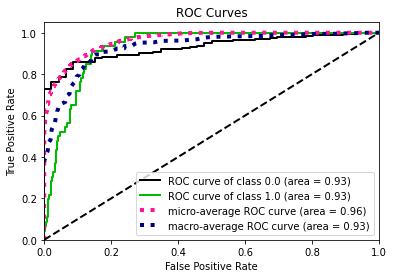

In [31]:
# model prediction
y_pred_lr_adjusted = (clf_lr.predict_proba(X_test)[:,1] >= 0.85).astype(int)
y_prob_lr_adjusted = clf_lr.predict_proba(X_test) + 0.15

recall = metrics.recall_score(y_test, y_pred_lr_adjusted, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred_lr_adjusted)
precision = metrics.precision_score(y_test, y_pred_lr_adjusted, average='macro')
macro_f1 = (metrics.f1_score(y_test, y_pred_lr_adjusted, average='macro'))
auc_score = roc_auc_score(y_test, y_prob_lr_adjusted[:, 1], average='macro')
print('recall-macro: %.4f' %recall)
print('accuracy: %.4f' %accuracy)
print('precision-macro: %.4f' %precision)
print('f1-macro: %.4f' %macro_f1)
print('auc-macro: %.4f' %auc_score)
print(confusion_matrix(y_test, y_pred_lr_adjusted))
print(classification_report(y_test, y_pred_lr_adjusted)) 

# ROC-AUC curve
skplt.metrics.plot_roc_curve(y_test, y_prob_lr_adjusted)
plt.show()

# Step 3 - Develop code to find a sample weighting scheme that produces better precision than the model in the second requirement

I used gridsearch to find the optimal weights of the two classes. The purpose is to let the model penalize misclassification of one class more, by assigning a higher weight to the class, and lower weight to the other class. Here I assume that weight of class 1 and class 0 sum up to 1. 

In [32]:
# define model
lr = LogisticRegression(random_state=123)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,10)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='precision', 
                          verbose=2).fit(X_train, y_train)

print(f'Best score: {gridsearch.best_score_} with param: {gridsearch.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.2s finished


Best score: 0.9428961987813352 with param: {'class_weight': {0: 0.88, 1: 0.12}}


### Use the best weight to train a Logistic Regression model

In [33]:
# final model
clf_lr_final = LogisticRegression(random_state=123, class_weight={0: 0.88, 1: 0.12})
# train model
clf_lr_final.fit(X_train, y_train)

# make prediction
y_pred_lr_final = clf_lr_final.predict(X_test)
y_prob_lr_final = clf_lr_final.predict_proba(X_test)
                   
# prediciton by tuning the threshold to 0.85                   
y_pred_lr_final_adj = (clf_lr_final.predict_proba(X_test)[:,1] >= 0.85).astype(int)
y_prob_lr_final_adj = clf_lr_final.predict_proba(X_test) - 0.35

In [34]:
# Model performance
recall = metrics.recall_score(y_test, y_pred_lr_final_adj, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred_lr_final_adj)
precision = metrics.precision_score(y_test, y_pred_lr_final_adj, average='macro')
macro_f1 = (metrics.f1_score(y_test, y_pred_lr_final_adj, average='macro'))
auc_score = roc_auc_score(y_test, y_prob_lr_final_adj[:, 1], average='macro')
print('recall-macro: %.4f' %recall)
print('accuracy: %.4f' %accuracy)
print('precision-macro: %.4f' %precision)
print('f1-macro: %.4f' %macro_f1)
print('auc-macro: %.4f' %auc_score)
print(confusion_matrix(y_test, y_pred_lr_final_adj))
print(classification_report(y_test, y_pred_lr_final_adj)) 

recall-macro: 0.5209
accuracy: 0.9880
precision-macro: 0.6059
f1-macro: 0.5333
auc-macro: 0.9330
[[4202    7]
 [  44    2]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4209
         1.0       0.22      0.04      0.07        46

    accuracy                           0.99      4255
   macro avg       0.61      0.52      0.53      4255
weighted avg       0.98      0.99      0.98      4255



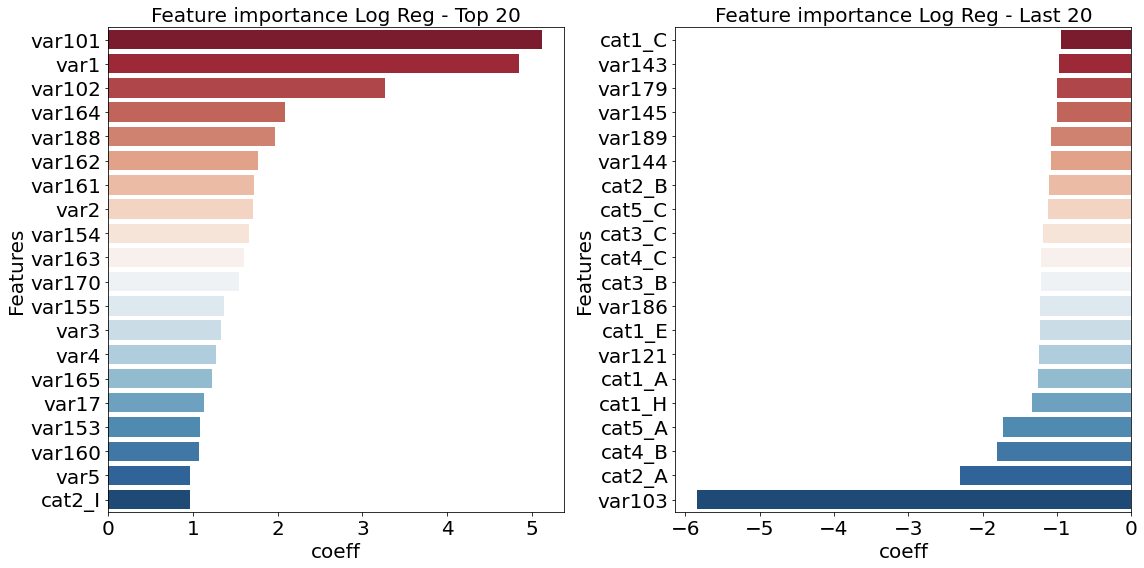

In [35]:
# calculate feature importance (coeff of logreg)
feature_importance = pd.DataFrame()
feature_importance['name'] = list(X_train.columns)
feature_importance['coeff'] = clf_lr_final.coef_[0]
# print(feature_importance.sort_values(by=['coeff']))

# Visualize it
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.barplot(x='coeff', y='name', data=feature_importance.sort_values(by='coeff', ascending=False)[:20], palette='RdBu', ax=ax1)
ax1.set_xlabel('coeff', fontsize=20)
ax1.set_ylabel('Features', fontsize=20)
ax1.tick_params(labelrotation=0, axis='both', which='major', labelsize=20)
ax1.set_title('Feature importance Log Reg - Top 20', fontsize=20)

sns.barplot(x='coeff', y='name', data=feature_importance.sort_values(by='coeff', ascending=False)[-20:], palette='RdBu', ax=ax2)
ax2.set_xlabel('coeff', fontsize=20)
ax2.set_ylabel('Features', fontsize=20)
ax2.tick_params(labelrotation=0, axis='both', which='major', labelsize=20)
ax2.set_title('Feature importance Log Reg - Last 20', fontsize=20)

plt.tight_layout()
plt.show()

# Findings

- This is a highly imbalanced dataset. Class 1 is less than 1%.
- I made an assumption that the cost of type I and type II error are equal, therefore, I used macro-f1 and macro-AUC as main metrics for measuring model performance. However, this needs to tie to the real business goal. 
- Logistic Regression performs better than Catboost and Xgboost.
- By tuning the decision threshold, the macro-precision of Logistic Regression improved from 0.533 to 0.553.
- By assigning different weights to the two classes, the macro-precision of Logistic Regression further improved to 0.606.
- The model does not get good use of the categorical features. I may consider excluding them, or trying different encoding methods.